In [2]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# tiny slice so it runs fast
ds = load_dataset("glue", "sst2")
texts = [ex["sentence"] for ex in ds["validation"].select(range(300))]
labels = [ex["label"] for ex in ds["validation"].select(range(300))]

len(texts), texts[0], labels[0]


(300, "it 's a charming and often affecting journey . ", 1)

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")
X = model.encode(texts, convert_to_numpy=True, batch_size=64, show_progress_bar=True)
X.shape


c:\Users\bhoom\OneDrive\Data Engineering Interview kit\BiasGuard\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhoom\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' pack

(300, 384)

In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")
X = model.encode(texts, convert_to_numpy=True, batch_size=64, show_progress_bar=True)
X.shape


Batches: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]


(300, 384)

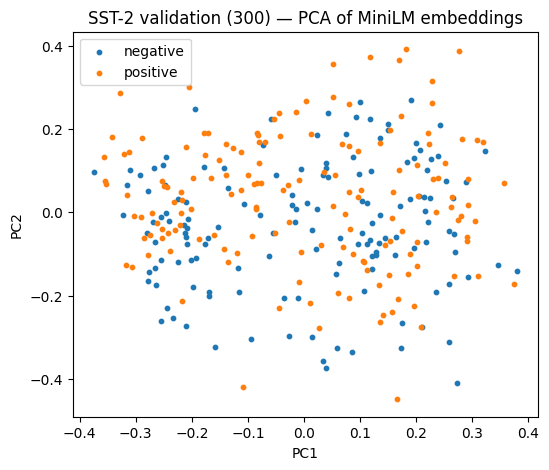

In [5]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for lab, name in [(0, "negative"), (1, "positive")]:
    idx = [i for i, y in enumerate(labels) if y == lab]
    plt.scatter(X2[idx,0], X2[idx,1], s=10, label=name)
plt.legend(); plt.title("SST-2 validation (300) — PCA of MiniLM embeddings")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
